<a href="https://colab.research.google.com/github/Soumita24/TIHAN/blob/main/Linear_Regression_Session_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Cell 0 — imports & utilities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats

# Display settings
np.set_printoptions(precision=4, suppress=True)
pd.options.display.float_format = '{:,.4f}'.format


In [3]:
# Cell 1 — creation of synthetic linear data with noise
np.random.seed(0)
n = 100
X = 2.5 * np.random.randn(n) + 1.5   # predictor
true_slope = 1.9
true_intercept = -0.5
noise = np.random.randn(n) * 1.2
y = true_intercept + true_slope * X + noise

df = pd.DataFrame({'X': X, 'y': y})
df.head()


,X,y
0,5.9101,12.9890
1,2.5004,2.6334
2,3.9468,5.4744
3,7.1022,14.1575
4,6.1689,9.8132


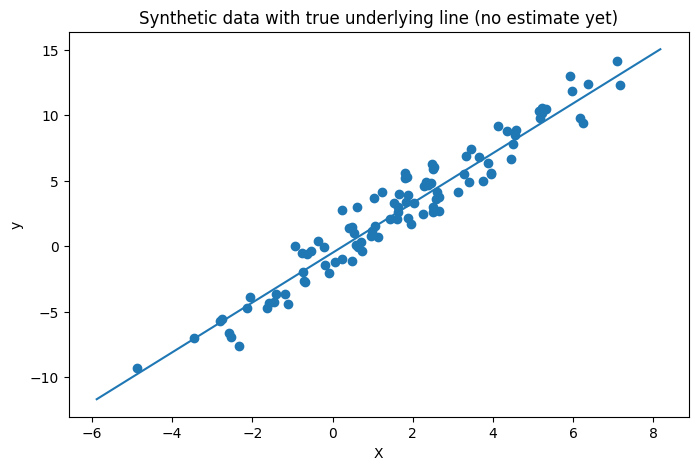

In [4]:
# Cell 2 — visual: scatter + true line
plt.figure(figsize=(8,5))
plt.scatter(X, y)
# draw true underlying line
x_line = np.array([X.min()-1, X.max()+1])
plt.plot(x_line, true_intercept + true_slope*x_line)
plt.title('Synthetic data with true underlying line (no estimate yet)')
plt.xlabel('X'); plt.ylabel('y')
plt.show()


# Fit with sklearn and statsmodels

In [5]:
# Cell 4 — sklearn fit (focus on prediction)
lr = LinearRegression()
lr.fit(X.reshape(-1,1), y)
print("sklearn intercept, slope:", lr.intercept_, lr.coef_[0])
y_pred_sklearn = lr.predict(X.reshape(-1,1))

# metrics
mse = mean_squared_error(y, y_pred_sklearn)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_sklearn)
print(f"RMSE: {rmse:.4f}, R^2: {r2:.4f}")


sklearn intercept, slope: -0.49239917009037537 1.955055248102262
RMSE: 1.2338, R^2: 0.9410


In [6]:
# Cell 5 — statsmodels OLS for inference (gives stderr, p-values, CI)
X_sm = sm.add_constant(X)   # adds intercept column
model = sm.OLS(y, X_sm).fit()
print(model.summary())
# coefficients, std err, t-stat, p-values, 95% CI.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1562.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           5.02e-62
Time:                        06:30:23   Log-Likelihood:                -162.91
No. Observations:                 100   AIC:                             329.8
Df Residuals:                      98   BIC:                             335.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4924      0.149     -3.305      0.0

Intercept (β₀): expected value of y when X=0. If X=0 is outside data range, interpret with caution.

Slope (β₁): expected change in y for a 1-unit increase in X, holding other variables constant (here only one predictor).

Significance: p-value tests H0: β=0. If p < chosen α (0.05), reject H0.

Confidence Interval: range likely to contain true β with chosen confidence (e.g., 95%).

# Diagnostic Plots — check model assumptions

Linear regression assumptions (for error term ε): linearity, independence, homoscedasticity (constant variance), normality of residuals. We'll plot:

# Fitted vs Actual (parity)

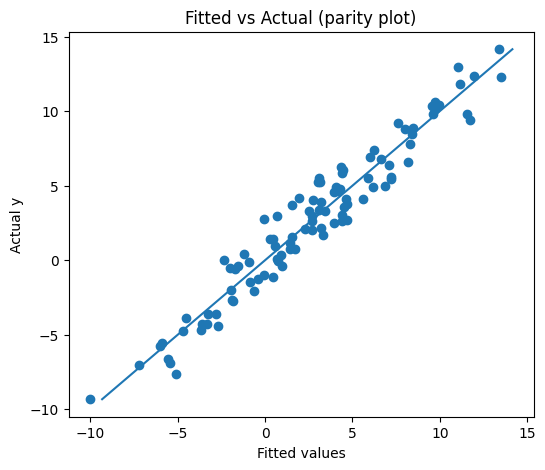

In [7]:
# Cell 7 — fitted vs actual
plt.figure(figsize=(6,5))
plt.scatter(y_pred_sklearn, y)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Fitted values'); plt.ylabel('Actual y')
plt.title('Fitted vs Actual (parity plot)')
plt.show()


Residuals vs Fitted: Used to assess daveiations from linearity

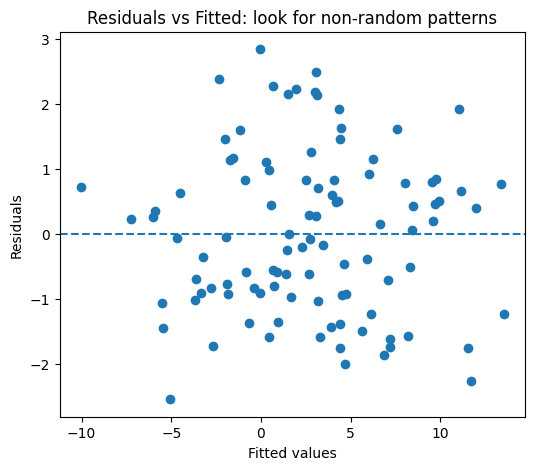

In [8]:
# Cell 8 — residuals vs fitted
residuals = y - y_pred_sklearn
plt.figure(figsize=(6,5))
plt.scatter(y_pred_sklearn, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel('Fitted values'); plt.ylabel('Residuals')
plt.title('Residuals vs Fitted: look for non-random patterns')
plt.show()


Interpretation: Residuals should scatter randomly around zero. Patterns indicate nonlinearity or omitted variables.

# Histogram + QQ-plot of residuals (normality)

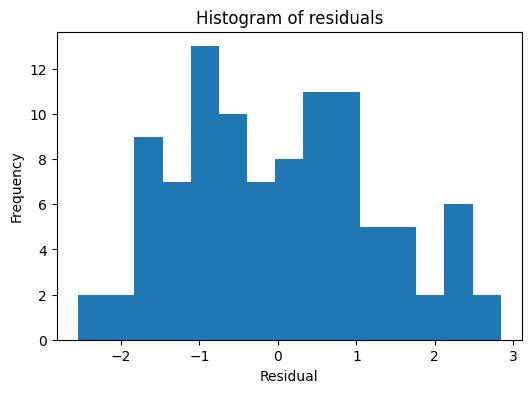

In [9]:
# Cell 9 — histogram of residuals
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=15)
plt.title('Histogram of residuals')
plt.xlabel('Residual'); plt.ylabel('Frequency')
plt.show()


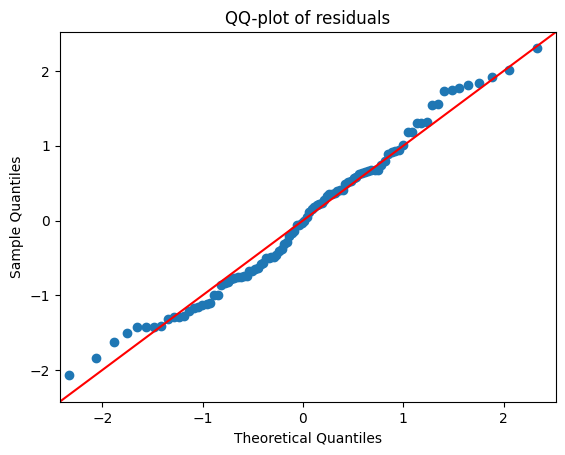

In [10]:
# Cell 10 — QQ plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ-plot of residuals')
plt.show()


If residuals deviate strongly from the line, normality assumption may be violated (affects inference).

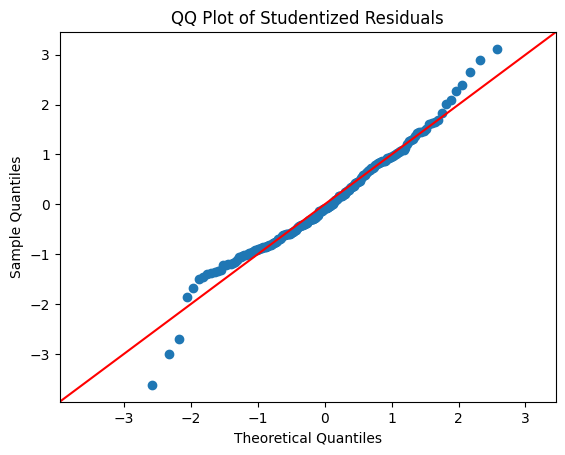

In [11]:
import numpy as np, statsmodels.api as sm, matplotlib.pyplot as plt

# toy linear model with roughly normal errors
rng = np.random.default_rng(0)
x = rng.uniform(0, 10, 200)
y = 2 + 3*x + rng.normal(0, 2, 200)

X = sm.add_constant(x)
m = sm.OLS(y, X).fit()

# studentized residuals (internal)
r = m.get_influence().resid_studentized_internal

sm.qqplot(r, line='45')  # '45' draws y=x reference
plt.title('QQ Plot of Studentized Residuals')
plt.show()


Now, we will see some cases where QQ plot shows right skew and heavy tales. For that, I have curated one scenario below.*italicized text*

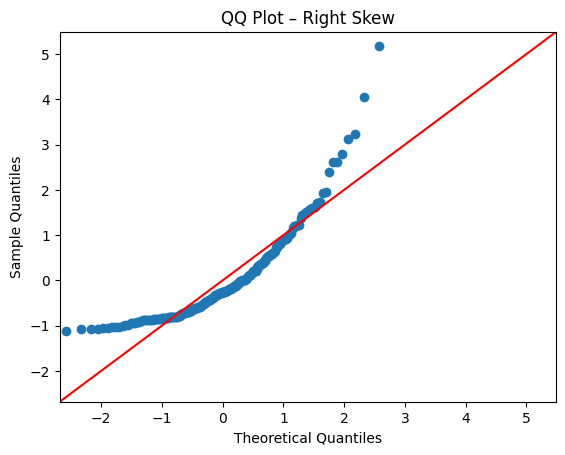

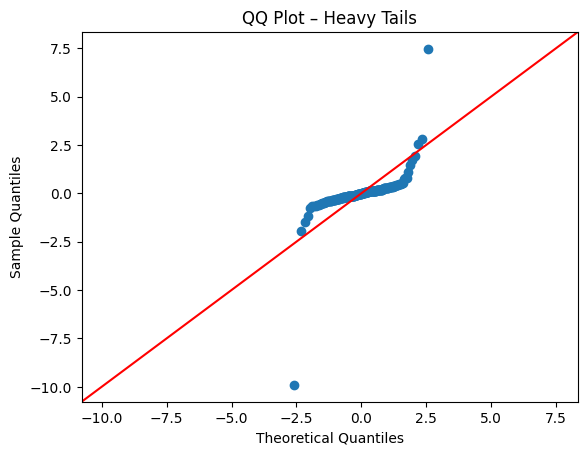

In [12]:
# Skewed errors example
e_skew = rng.exponential(scale=1, size=200) - 1  # right-skew
y_skew = 2 + 3*x + e_skew
m_skew = sm.OLS(y_skew, X).fit()
r_skew = m_skew.get_influence().resid_studentized_internal
sm.qqplot(r_skew, line='45'); plt.title('QQ Plot – Right Skew'); plt.show()

# Heavy tails example (t with 2 df)
e_heavy = rng.standard_t(df=2, size=200)
y_heavy = 2 + 3*x + e_heavy
m_heavy = sm.OLS(y_heavy, X).fit()
r_heavy = m_heavy.get_influence().resid_studentized_internal
sm.qqplot(r_heavy, line='45'); plt.title('QQ Plot – Heavy Tails'); plt.show()


# Heteroscedasticity check


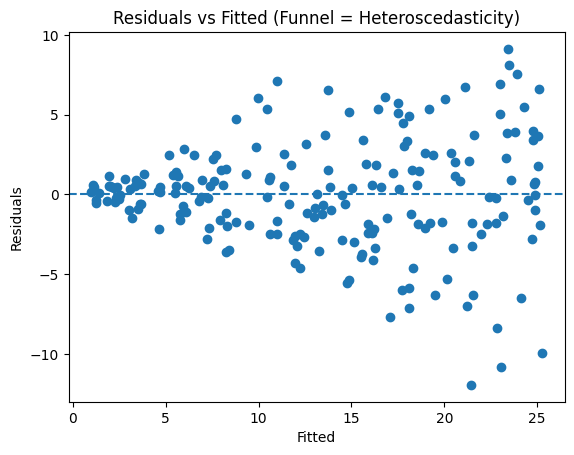

In [13]:
rng = np.random.default_rng(2)
n = 200
x = rng.uniform(0, 10, n)
sigma = 0.4 + 0.5*x              # variance increases with x
y = 1 + 2.5*x + rng.normal(0, sigma, n)

df = pd.DataFrame({'x': x, 'y': y})
X = sm.add_constant(df['x'])
m = sm.OLS(df['y'], X).fit()

fitted = m.fittedvalues
resid = m.resid

plt.scatter(fitted, resid)
plt.axhline(0, ls='--'); plt.xlabel('Fitted'); plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Funnel = Heteroscedasticity)'); plt.show()



The above figure shows a funnel like structure, which means there is Heteroscedasticity.


**Common causes**

Nonlinearity left in the mean: model too simple (missing terms, interactions, splines).

Variance tied to the mean (e.g., multiplicative noise): Var(ε|X) increases with ŷ.

Scale issues / skewed targets (positive, heavy-tailed outcomes: income, latency, counts).

Omitted variables that both increase the mean and the variability.

Mixture populations (different regimes/groups pooled together).

**What to do (practical fixes)**

1. Fix the mean first (often the real cause)

Add nonlinear terms (polynomials, splines) or interactions.

Add missing predictors or segment by groups.

2. Transform the outcome (stabilize variance)

If variance grows with level: try log(y) (or Box–Cox).

Counts: use √y or switch to a count model (below).

Proportions in (0,1): consider logit/arcsin√ transforms (or a Beta regression).

3. Use a model with the right mean–variance link

GLM:

Counts → Poisson/NegBin (log link).

Positive continuous (right-skew) → Gamma (log link).

Proportions → Beta regression.

These directly model variance as a function of the mean.

4. If you must keep OLS, fix inference

Use heteroscedasticity-robust SEs (HC0/HC1/HC3). Coefficients unchanged; tests become valid.

Consider Weighted Least Squares (WLS)/GLS if you can model Var(ε|X).

Example rule of thumb: if Var ∝ ŷ², weight by w = 1/ŷ².

5. Robust regression (Huber/Tukey) can help with outliers but doesn’t directly model heteroscedasticity; pair it with robust SEs.

# Exercise:

Generate data where y = 2 + 0.5 x + noise. Fit model — compare coefficient estimate distribution when noise variance increases.

Create nonlinear data (e.g., y = x^2 + noise). Fit linear model and show residual pattern.

Use real dataset: sklearn.datasets.load_diabetes() — pick one feature, fit, and run diagnostics.

Show effect of log-transform on heteroscedastic data (transform y or X and re-fit).

# When linear regression fails / diagnostics to watch for

Nonlinearity (pattern in residuals vs fitted) → consider polynomial, splines, or transformations.

Heteroscedasticity (funnel shape in residuals vs fitted) → consider weighted least squares or transform y.

Non-normal residuals (heavy tails) → inference unreliable; use robust standard errors or bootstrap.

Multicollinearity (multiple predictors highly correlated) → inflated variances for coefficients; detect via VIF.

